Mean Squared Error: 549179.5974522987


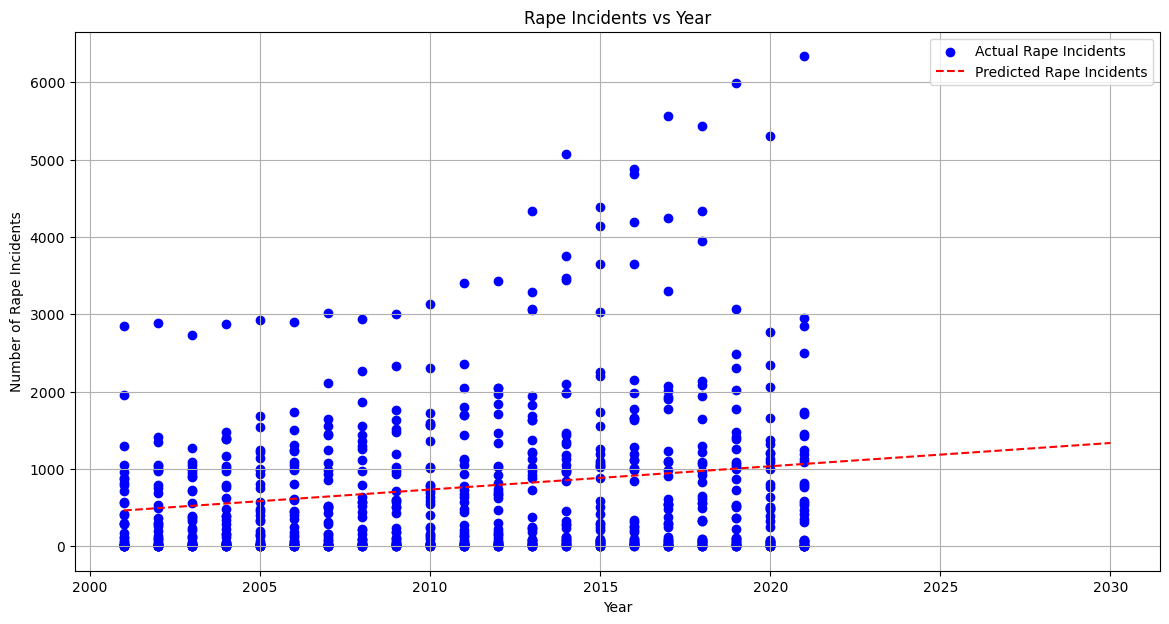

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

file_path = 'CrimesOnWomenData.csv'
data = pd.read_csv(file_path)

data = data.dropna()
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Rape'] = pd.to_numeric(data['Rape'], errors='coerce')
data = data.dropna(subset=['Rape', 'Year'])


X = data[['Year']]
y = data['Rape']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

future_years = pd.DataFrame({'Year': np.arange(X['Year'].min(), X['Year'].max() + 10)})
future_predictions = model.predict(future_years)

plt.figure(figsize=(14, 7))
plt.scatter(data['Year'], data['Rape'], color='blue', label='Actual Rape Incidents')
plt.plot(future_years, future_predictions, color='red', linestyle='--', label='Predicted Rape Incidents')
plt.xlabel('Year')
plt.ylabel('Number of Rape Incidents')
plt.title('Rape Incidents vs Year')
plt.legend()
plt.grid(True)
plt.show()